In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
import os
# sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
# import jsm_halopull
# import jsm_SHMR
# import jsm_mcmc
# import jsm_stats
# import jsm_models

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points


In [3]:
tree_data = np.load("/Users/jsmonzon/Research/data/preliminary/tree_data/test_evo/12_4_0/tree_0_evo.npz")

In [4]:
def main_progenitor_history(datadir, Ntree):
    thin = 25 

    files = []    
    for filename in os.listdir(datadir):
        if filename.startswith('tree') and filename.endswith('evo.npz'): 
            files.append(os.path.join(datadir, filename))

    host_mat = np.zeros(shape=(Ntree,354))
    N_sub = np.zeros(shape=Ntree)
    for i, file in enumerate(files[0:Ntree]):
        tree_data_i = np.load(file)
        if tree_data_i["mass"][0,:].shape[0] == 354:
            host_mat[i] = np.log10(tree_data_i["mass"][0,:])
            surv = []
            for j, val in enumerate(tree_data_i["mass"]):
                final_mass = val[0]
                peak_mass = val.max()
                if np.log10(final_mass) - np.log10(peak_mass) > -4:
                    surv.append(j)
            N_sub[i] = len(surv)

    quant = np.percentile(host_mat, np.array([5, 50, 95]), axis=0, method="closest_observation")
    error = np.array([quant[1][::thin] - quant[0][::thin], quant[2][::thin] - quant[1][::thin]])

    return host_mat, quant, error, N_sub

In [5]:
s0 = np.load("../../../data/progen/s0.npz")
s15 = np.load("../../../data/progen/s15.npz")
s30 = np.load("../../../data/progen/s30.npz")

In [6]:
for i in s0.keys():
    print(i)

host_history
value
error
N_sub


In [7]:
s0["error"]

array([[0.        , 0.10437302, 0.2052332 , 0.25046132, 0.28573299,
        0.34158076, 0.38875354, 0.44213204, 0.50413028, 0.53880468,
        0.60482553, 0.72038533, 0.60679865,        nan,        nan],
       [0.        , 0.00397257, 0.01376613, 0.0333987 , 0.06994801,
        0.11988367, 0.1944583 , 0.26908051, 0.37213025, 0.41819703,
        0.45787313, 0.56093727, 0.68913708,        nan,        nan]])

In [8]:
norm = Normalize(vmin=60, vmax=250)
cmap = plt.get_cmap('RdBu_r')
select = np.random.randint(0,1000,1000)

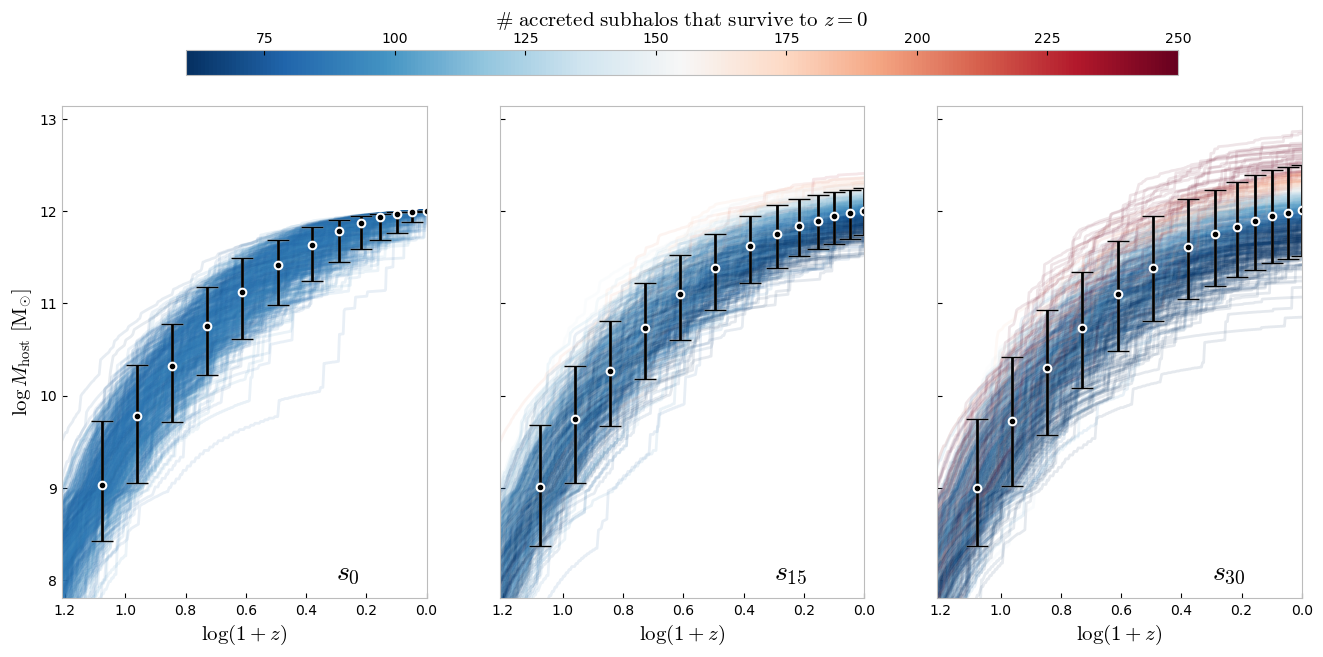

In [9]:
thin = 25
fig, axs = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(16,8))

for i in range(500):
    axs[0].plot(np.log10(tree_data["redshift"]+1), s0["host_history"][i], color=cmap(norm(s0["N_sub"][i])), alpha=0.1)
    axs[1].plot(np.log10(tree_data["redshift"]+1), s15["host_history"][i], color=cmap(norm(s15["N_sub"][i])), alpha=0.1)
    axs[2].plot(np.log10(tree_data["redshift"]+1), s30["host_history"][i], color=cmap(norm(s30["N_sub"][i])), alpha=0.1)


axs[0].errorbar(np.log10(tree_data["redshift"][::thin]+1), s0["value"], yerr=s0["error"], fmt="o", capsize=8, color="white")
axs[0].errorbar(np.log10(tree_data["redshift"][::thin]+1), s0["value"], yerr=s0["error"], fmt=".", capsize=8, color="black")
axs[0].text(0.3, 8, "$s_0$", fontsize=20)

axs[1].errorbar(np.log10(tree_data["redshift"][::thin]+1), s15["value"], yerr=s15["error"], fmt="o", capsize=8, color="white")
axs[1].errorbar(np.log10(tree_data["redshift"][::thin]+1), s15["value"], yerr=s15["error"], fmt=".", capsize=8, color="black")
axs[1].text(0.3, 8, "$s_{15}$", fontsize=20)

axs[2].errorbar(np.log10(tree_data["redshift"][::thin]+1), s30["value"], yerr=s30["error"], fmt="o", capsize=8, color="white")
axs[2].errorbar(np.log10(tree_data["redshift"][::thin]+1), s30["value"], yerr=s30["error"], fmt=".", capsize=8, color="black")
axs[2].text(0.3, 8, "$s_{30}$", fontsize=20)

axs[0].set_xlim(1.21,0)
axs[0].set_ylim(7.8)
axs[0].set_xlabel("$\log (1+z)$")
axs[1].set_xlabel("$\log (1+z)$")
axs[2].set_xlabel("$\log (1+z)$")

axs[0].set_ylabel("$\log M_{\mathrm{host}}\ [\mathrm{M}_{\odot}]$")

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs, orientation='horizontal', location="top", pad=0.05, aspect=40, shrink=0.8)
cbar.set_label('$ \#\ \mathrm{accreted}\ \mathrm{subhalos}\ \mathrm{that}\ \mathrm{survive}\ \mathrm{to}\ z=0$')

fig.savefig("../../../paper_1/figures/updated/progen_history.pdf", bbox_inches='tight')
plt.show()
#plt.show()accreted

In [10]:

# for i in range(tree_data["mass"].shape[0]):
#     plt.plot(np.log(tree_data["redshift"]+1), np.log10(tree_data["mass"][i]), alpha=0.2)

# plt.plot(np.log(tree_data["redshift"]+1), np.log10(tree_data["mass"][0]), color="firebrick", label="$\mathrm{host\ halo}$")
# plt.xlim(2.7,0)
# plt.ylim(7.6, 12.3)
# plt.legend()
# plt.xlabel("$\log (1+z)$")
# plt.ylabel("$\log M_{\mathrm{vir}}\ [\mathrm{M}_{\odot}]$")

# plt.savefig("../../figures/paper/single_host_history.pdf", bbox_inches='tight')

# plt.show()